In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
from sklearn.neighbors import KernelDensity

Reading the data

In [3]:
data = pd.read_csv('../../../Data/CoCo.csv')
CoCo =  data['yield'].values
CoCo = CoCo.reshape(-1,1)

TopHat Kernel

In [4]:
kde = KernelDensity(kernel='tophat')
kde.fit(CoCo)

KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='tophat', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

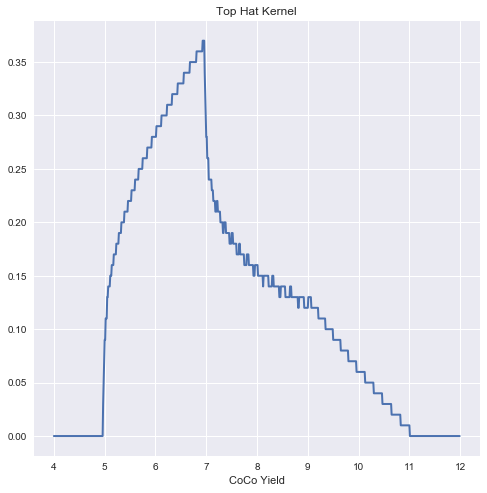

In [5]:
fig = plt.figure(figsize=(8,8))
x= np.arange(4,12,0.01)
x=x.reshape(-1,1)
log_dens = kde.score_samples(x)
log_dens = log_dens.reshape(-1,1)
plt.plot(x, np.exp(log_dens),linewidth=2)
plt.xlabel('CoCo Yield');
plt.title('Top Hat Kernel');

Gaussian Kernel with $\lambda=1$

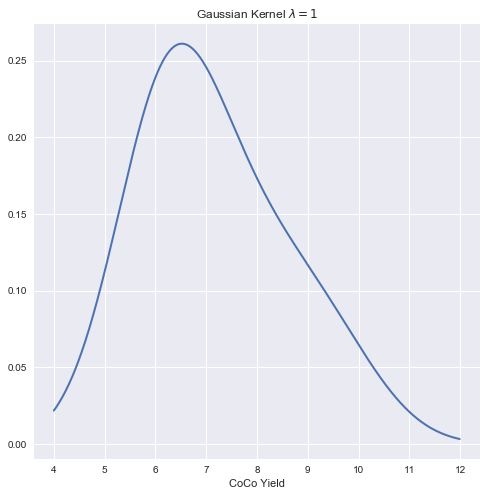

In [6]:
fig = plt.figure(figsize=(8,8))
kde = KernelDensity(kernel='gaussian',bandwidth=1)
kde.fit(CoCo)
x= np.arange(4,12,0.01)
x=x.reshape(len(x),1)
log_dens = kde.score_samples(x)
log_dens = log_dens[:,np.newaxis]
plt.plot(x, np.exp(log_dens),linewidth=2);
plt.xlabel('CoCo Yield');
plt.title('Gaussian Kernel $\lambda =1$');

Create kernel density for different bandwidths :
$[1.0,2.0,3.0]$

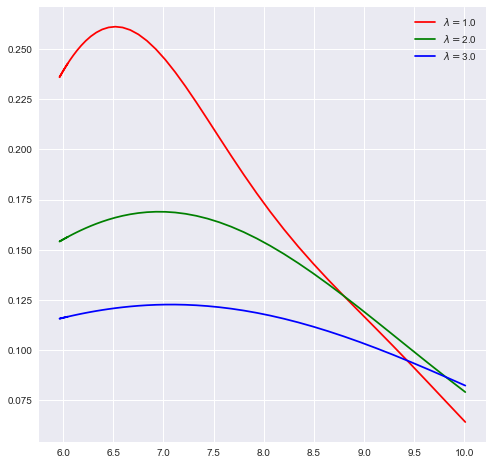

In [7]:
fig = plt.figure(figsize=(8,8))
bw = np.array([1.0,2,3])
i=0
color = ['r','g','b']
for b in bw:
    kde =KernelDensity(kernel='gaussian',bandwidth=b)
    kde.fit(CoCo)
    plt.plot(CoCo,np.exp(kde.score_samples(CoCo)),color[i],label='$\lambda=$'+str(b))
    i+=1
plt.legend();
    

Finding the probability that yield between 7 and 8.<br>
The kernel can be used as random number generator.

In [8]:
bw = np.array([1,2,3])
for b in bw:
    kde =KernelDensity(kernel='gaussian',bandwidth=b)
    kde.fit(CoCo)
    v=kde.sample(n_samples=1000)
    print('Bandwidth' + str(b))
    print('Prob=' + str(sum((v<8)&(v>7))/len(v)))

Bandwidth1
Prob=[0.196]
Bandwidth2
Prob=[0.167]
Bandwidth3
Prob=[0.134]


<h3>Finding the optimal bandwidth</h3>

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
param = {'bandwidth':np.arange(0.01,3,0.005)}
grid= GridSearchCV(KernelDensity(),param)
grid.fit(CoCo)

GridSearchCV(cv=None, error_score='raise',
       estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'bandwidth': array([0.01 , 0.015, ..., 2.99 , 2.995])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [11]:
grid.best_estimator_.bandwidth

1.7249999999999996